# Perceptron learning algorithm
[10 = dataset creation 2 + perceptron learning algorithm 5 + analysis 3]

Implement perceptron learning algorithm for classifying a linearly separable dataset in 2D. Note
that you have to create such a dataset with at least 1000 data points.
Discuss your observations with respect to number of iterations required for perfect classification (k)
by varying the level of separability (γ from the class discussions) in the dataset. (Hint: compute
the average value of k for each level of γ, and do this for about 5 values of γ. Observe if you can
relate to the result discussed in class)

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import sklearn.datasets
from math import sqrt

In [ ]:
# N1 = no. of +ve class samples, N2 = no. of -ve class samples
# n = no. of features per sample
N1 = 500
N2 = 500
N = N1 + N2
n = 2
gamma_arr = []
epoch_arr = []
means = [3.0, 2.2, 2.15, 2.13, 2.1]

In [ ]:
# function to create linearly separable 2D dataset from normal distribution
def create_dataset(mean):
  pos_class_samples = torch.normal(mean=mean, std=0.5, size=(N1, n))
  neg_class_samples = torch.normal(mean=2.0-mean, std=0.45, size=(N2, n))
  return pos_class_samples, neg_class_samples

In [ ]:
# function to plot the graph of dataset before training
def plot_graph_before_training(pos_class_samples, neg_class_samples):
  X = np.linspace(-3,5,100)
  plt.scatter(pos_class_samples[:,0], pos_class_samples[:,1])
  plt.scatter(neg_class_samples[:,0], neg_class_samples[:,1])
  y = 0 * X
  plt.plot(X, y, '-r', label='W')
  plt.title('Graph of W before training')
  plt.xlabel('x1', color='#1C2832')
  plt.ylabel('x2', color='#1C2832')
  plt.legend(loc='upper left')
  plt.show()

In [ ]:
# function to find the level of separability (γ) as minimum Euclidean distance between +ve class & -ve class samples
def separability(pos_class_samples, neg_class_samples):
  min_dist = float('inf')
  for pos in pos_class_samples:
    x1 = pos[0].item()
    x2 = pos[1].item()
    for neg in neg_class_samples:
      y1 = neg[0].item()
      y2 = neg[1].item()
      dist = sqrt((x1 - y1)**2 + (x2 - y2)**2)
      min_dist = min(dist, min_dist)
  return min_dist

In [ ]:
# function to prepare our training dataset in X & Y
def prepare_X_and_Y(pos_class_samples, neg_class_samples):
  X = torch.empty(N, n + 1)
  X[:, 0] = 1
  X[0:N1, 1:] = pos_class_samples
  X[N1:N, 1:] = neg_class_samples

  Y = torch.empty(N)
  Y[:N1] = 1.0
  Y[N1:N] = -1.0
  return X, Y

In [ ]:
# function to initialise the learnable network parameters
# here, W matrix consists of both weight and bias (W[0] ==> bias, (W[1], W[2]) ==> weights)
def initialise_perceptron_parameters(n):
  W = torch.zeros(n + 1)
  return W

In [ ]:
# function to implement perceptron learning on our 2D linearly separable dataset
def perceptron_training(X, y, W):
  # A scan through dataset once is counted as an epoch
  # Initialise the epochs to 0
  epochs = 0
  print("#Epoch vs #Errors")
  
  while(True): # This line is same as while(!convergence)
    
    # Initialise no. of errors per epoch to 0
    errors = 0

    for i in range(X.size(0)):
      
      # y_pred = (W.T)x
      # if (y_pred > 0 and y < 0) or (y_pred < 0 and y > 0), we have an error, so update the weights & bias
      if(W.dot(X[i]) * y[i] <= 0):
        
        # perceptron update rule
        W = W + y[i] * X[i]
        errors += 1
    epochs += 1
    print(epochs, "th iteration : ", errors)

    # if there were no errors in current epoch, it means we achieved convergence
    if(errors == 0):
      epoch_arr.append(epochs)
      print("Convergence achieved in", epochs, "epochs")
      break
  return W

In [ ]:
# function to plot the classifier & dataset after training
def plot_graph_after_training(pos_class_samples, neg_class_samples, W):
  X = np.linspace(-2,4,100)
  # .item() --> It returns the value of the tensor as a standard Python number
  # e.g. print(W[2]) gives tensor(2.4507)
  # but print(W[2].item()) gives 2.4507
  y = -(W[2].item() / W[1].item())* X - (W[0].item() / W[1].item())
  plt.plot(X, y, '-r', label='W')
  plt.title('Graph of W after training')
  plt.xlabel('x1', color='#1C2823')
  plt.ylabel('x2', color='#1C2823')
  plt.legend(loc='upper left')
  plt.scatter(pos_class_samples[:,0], pos_class_samples[:,1])
  plt.scatter(neg_class_samples[:,0], neg_class_samples[:,1])
  plt.grid()
  plt.show()

In [ ]:
def solve_question_1():
  for i in range(len(means)):
    print("Iteration", i + 1)
    pos_class_samples, neg_class_samples = create_dataset(means[i])
    
    plot_graph_before_training(pos_class_samples, neg_class_samples)
    
    gamma = separability(pos_class_samples, neg_class_samples)
    gamma_arr.append(gamma)
    print("Level of separability(γ) =", gamma)
    
    X, Y = prepare_X_and_Y(pos_class_samples, neg_class_samples)
    print("X.shape =", X.shape, "Y.shape =", Y.shape)
    
    W = initialise_perceptron_parameters(n)
    print("W.shape =", W.shape)

    W = perceptron_training(X, Y, W)

    plot_graph_after_training(pos_class_samples, neg_class_samples, W)
    print("\n\n--------------------------------------------------------------------------------------\n")

Iteration 1


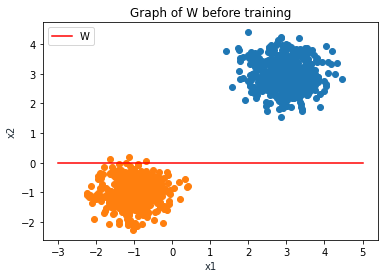

Level of separability(γ) = 3.0926756447825166
X.shape = torch.Size([1000, 3]) Y.shape = torch.Size([1000])
W.shape = torch.Size([3])
#Epoch vs #Errors
1 th iteration :  2
2 th iteration :  0
Convergence achieved in 2 epochs


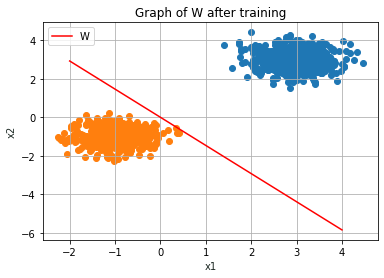



--------------------------------------------------------------------------------------

Iteration 2


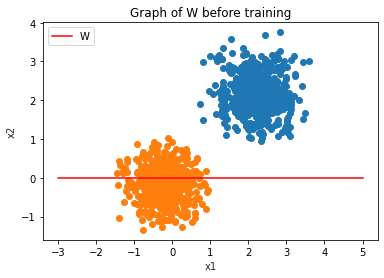

Level of separability(γ) = 0.8794139406821083
X.shape = torch.Size([1000, 3]) Y.shape = torch.Size([1000])
W.shape = torch.Size([3])
#Epoch vs #Errors
1 th iteration :  5
2 th iteration :  0
Convergence achieved in 2 epochs


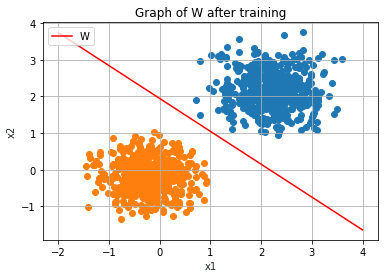



--------------------------------------------------------------------------------------

Iteration 3


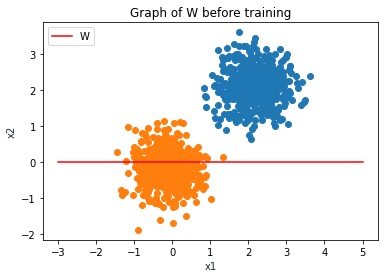

Level of separability(γ) = 0.7460121801115909
X.shape = torch.Size([1000, 3]) Y.shape = torch.Size([1000])
W.shape = torch.Size([3])
#Epoch vs #Errors
1 th iteration :  4
2 th iteration :  0
Convergence achieved in 2 epochs


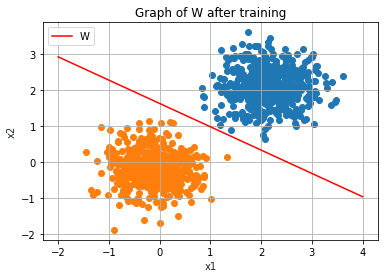



--------------------------------------------------------------------------------------

Iteration 4


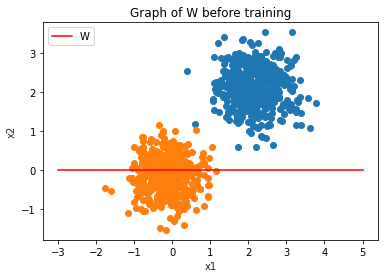

Level of separability(γ) = 0.15565933595622342
X.shape = torch.Size([1000, 3]) Y.shape = torch.Size([1000])
W.shape = torch.Size([3])
#Epoch vs #Errors
1 th iteration :  5
2 th iteration :  3
3 th iteration :  2
4 th iteration :  3
5 th iteration :  2
6 th iteration :  3
7 th iteration :  2
8 th iteration :  2
9 th iteration :  2
10 th iteration :  2
11 th iteration :  2
12 th iteration :  2
13 th iteration :  0
Convergence achieved in 13 epochs


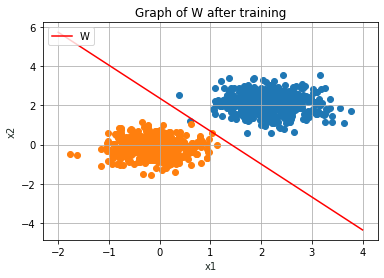



--------------------------------------------------------------------------------------

Iteration 5


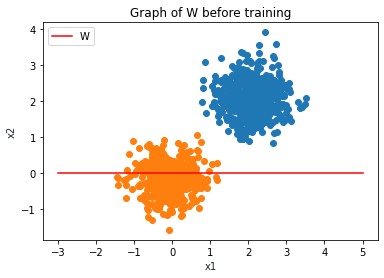

Level of separability(γ) = 0.664330157602741
X.shape = torch.Size([1000, 3]) Y.shape = torch.Size([1000])
W.shape = torch.Size([3])
#Epoch vs #Errors
1 th iteration :  5
2 th iteration :  3
3 th iteration :  2
4 th iteration :  0
Convergence achieved in 4 epochs


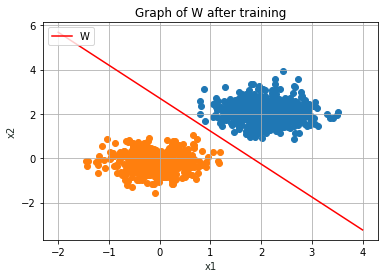



--------------------------------------------------------------------------------------



In [ ]:
solve_question_1()

### Observation : As the level of separability(γ) between +ve class points & -ve class points decreases, more number of epochs are needed for convergence as we can see in the graph shown below

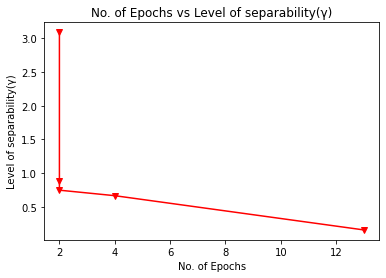

In [ ]:
for i in range(0, len(gamma_arr)):
  for j in range(0, len(gamma_arr) - i - 1):
    if(gamma_arr[j] >= gamma_arr[j + 1]):
      gamma_arr[j], gamma_arr[j + 1] = gamma_arr[j + 1], gamma_arr[j]
      epoch_arr[j], epoch_arr[j + 1] = epoch_arr[j + 1], epoch_arr[j]

plt.xlabel("No. of Epochs")
plt.ylabel("Level of separability(γ)")
plt.title("No. of Epochs vs Level of separability(γ)")
plt.plot(epoch_arr, gamma_arr, color='r', marker='v')
plt.show()

# 2. Gradient descent for training a linear classifier
[10 = loss formulation 4 + gradient computation 3 + update equation 3]

Consider solving the above problem (training a line for classifying a linearly separable 2D dataset)
using Gradient Descent algorithm. Think of a loss function based on our classroom discussion.
You may implement the analytical way of finding gradient for it. You may implement the basic
version of gradient descent update equation.

In [ ]:
# N1 = no. of +ve class samples, N2 = no. of -ve class samples
# n = no. of features
# eta = learning rate
N1 = 525
N2 = 550
N = N1 + N2
n = 2
eta = 0.01

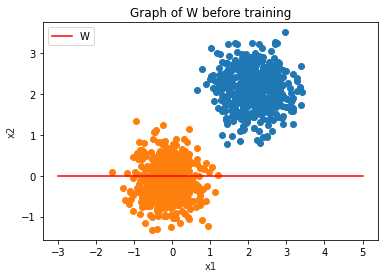

X.shape = torch.Size([1075, 2]) Y.shape = torch.Size([1075])


In [ ]:
pos_class_samples, neg_class_samples = create_dataset(mean=2.12)

plot_graph_before_training(pos_class_samples, neg_class_samples)

X = torch.empty(N, n)
X[0:N1, :] = pos_class_samples
X[N1:N, :] = neg_class_samples

Y = torch.empty(N)
Y[:N1] = 1.0
Y[N1:N] = -1.0
print("X.shape =", X.shape, "Y.shape =", Y.shape)

In [ ]:
W = torch.zeros(n)
b = torch.zeros(1)
print("W.shape =", W.shape, "b.shape =", b.shape)

W.shape = torch.Size([2]) b.shape = torch.Size([1])


In [ ]:
def logistic_loss(W, b, x, y):
    return np.log(1.0 + np.exp(-y*(x.dot(W) + b)))

In [ ]:
def rho(W, b, x, y):
    e = np.exp(-y*(x.dot(W) + b))
    return  -e / (1.0 + e)

In [ ]:
def grad_w(W, b, x, y):
  _rho = rho(W, b, x, y)
  x1, x2 = x[0].item(), x[1].item()
  dw1 = _rho * y * x1
  dw2 = _rho * y * x2
  return torch.tensor([dw1, dw2])

In [ ]:
def grad_b(W, b, x, y):
  _rho = rho(W, b, x, y)
  db = _rho * y
  return torch.tensor([db])

In [ ]:
def stochastic_gradient_descent(X, Y, N, eta, W, b):
  epochs = 0
  MAX_EPOCHS = 3000 
  loss_arr, error_arr = [], []
  while(epochs < MAX_EPOCHS):
    dW, db = torch.zeros(W.shape), torch.zeros(b.shape)
    loss_per_epoch = 0
    errors_per_epoch = 0
    for x, y in zip(X, Y):
      if((x.dot(W) + b) * y <= 0):
        loss_per_epoch += logistic_loss(W, b, x, y)
        dW = grad_w(W, b, x, y)
        db = grad_b(W, b, x, y)
        W = W - eta * dW
        b = b - eta * db
        errors_per_epoch += 1
    epochs +=1
    loss_arr.append(loss_per_epoch)
    error_arr.append(errors_per_epoch)
    if(errors_per_epoch == 0):
      print("Convergence achieved in", epochs, "epochs")
      break
  return W, b, loss_arr, error_arr

In [ ]:
W, b, loss_arr, error_arr = stochastic_gradient_descent(X, Y, N, eta, W, b)

Convergence achieved in 3 epochs


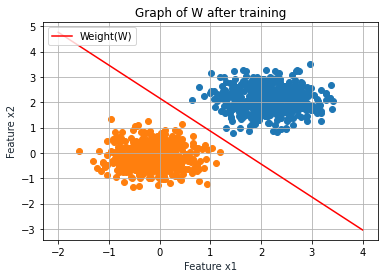

In [ ]:
X = np.linspace(-2,4,10)
# .item() --> It returns the value of the tensor as a standard Python number
# e.g. print(W[2]) gives tensor(2.4507)
# but print(W[2].item()) gives 2.4507
y = -(W[1].item() / W[0].item())* X - (b[0].item() / W[0].item())
plt.plot(X, y, '-r', label='Weight(W)')
plt.title('Graph of W after training')
plt.xlabel('Feature x1', color='#1C2833')
plt.ylabel('Feature x2', color='#1C2833')
plt.legend(loc='upper left')
plt.scatter(pos_class_samples[:,0], pos_class_samples[:,1])
plt.scatter(neg_class_samples[:,0], neg_class_samples[:,1])
plt.grid()
plt.show()

# 3) MLP with a single hidden layer
[20 = dataset creation 3 + MLP definition 3 + backprop 10 + elegance/recursion 4]

Consider a binary classification dataset that is not linearly separable in 2D (e.g. data lying on the
circumference two concentric circles). Train a Multi layer perceptron (MLP) with a single hidden
layer for classifying the same. You may use the loss function used in problem 2. You have to
implement the gradient descent (i.e. backpropagation) algorithm yourself.

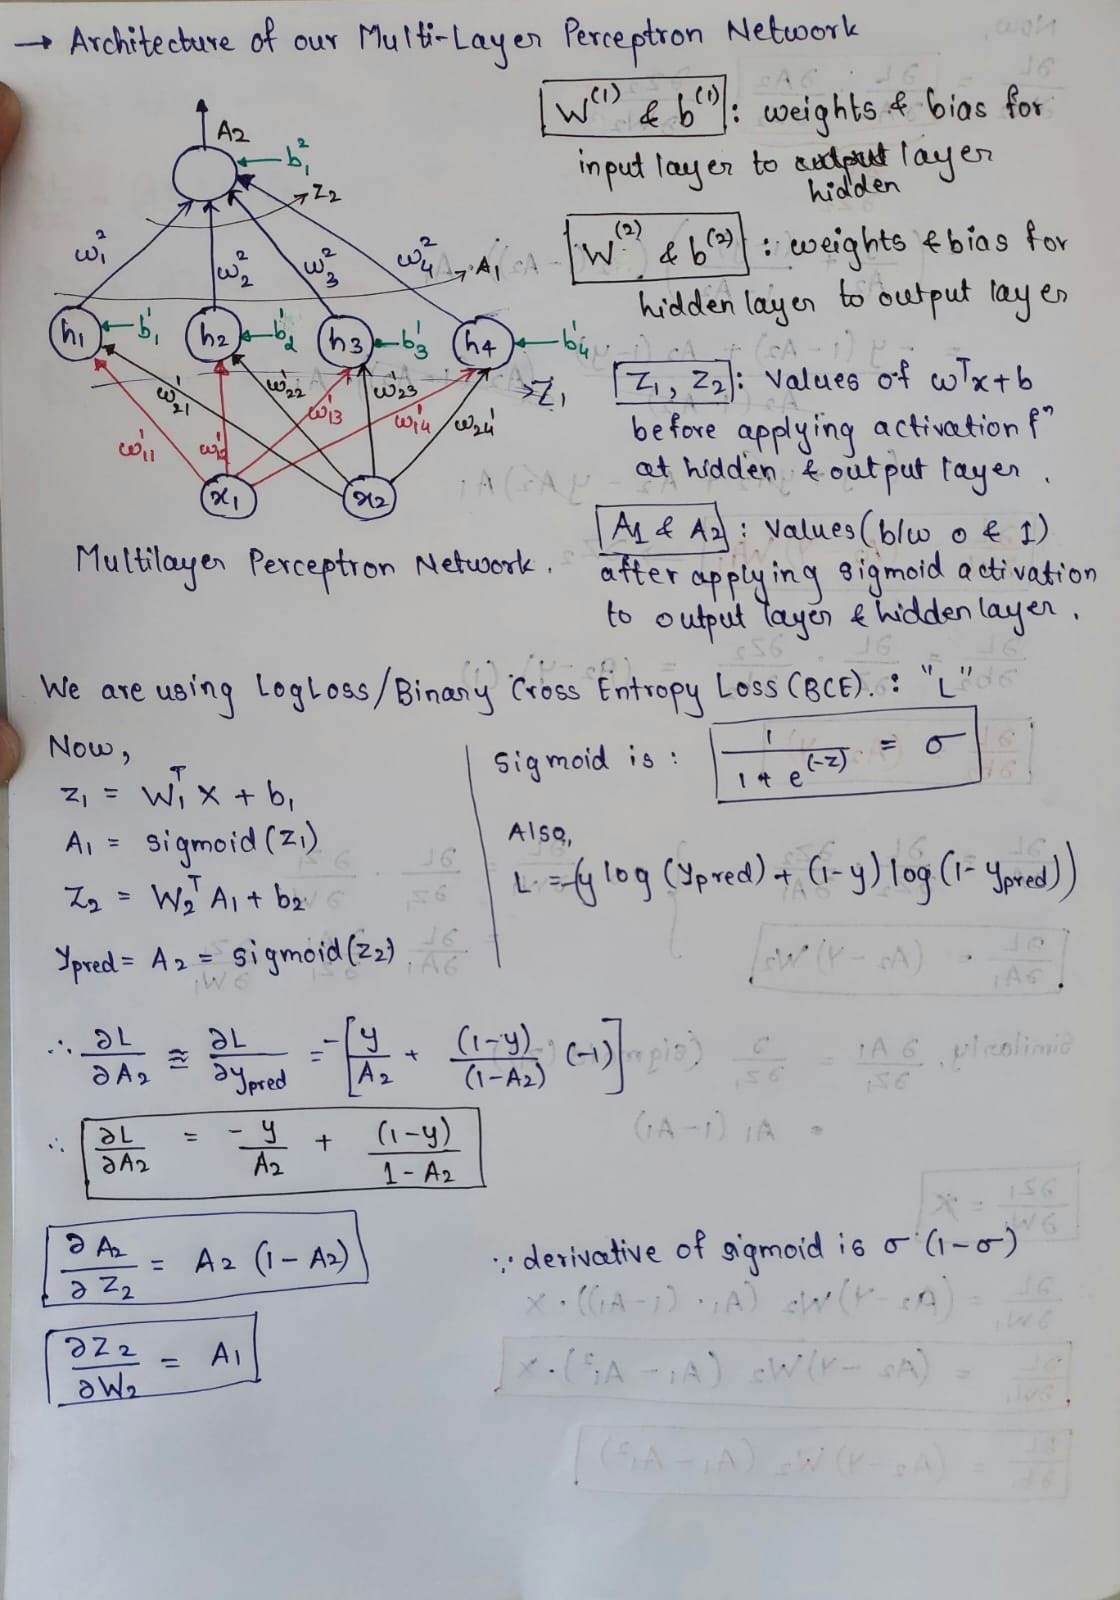

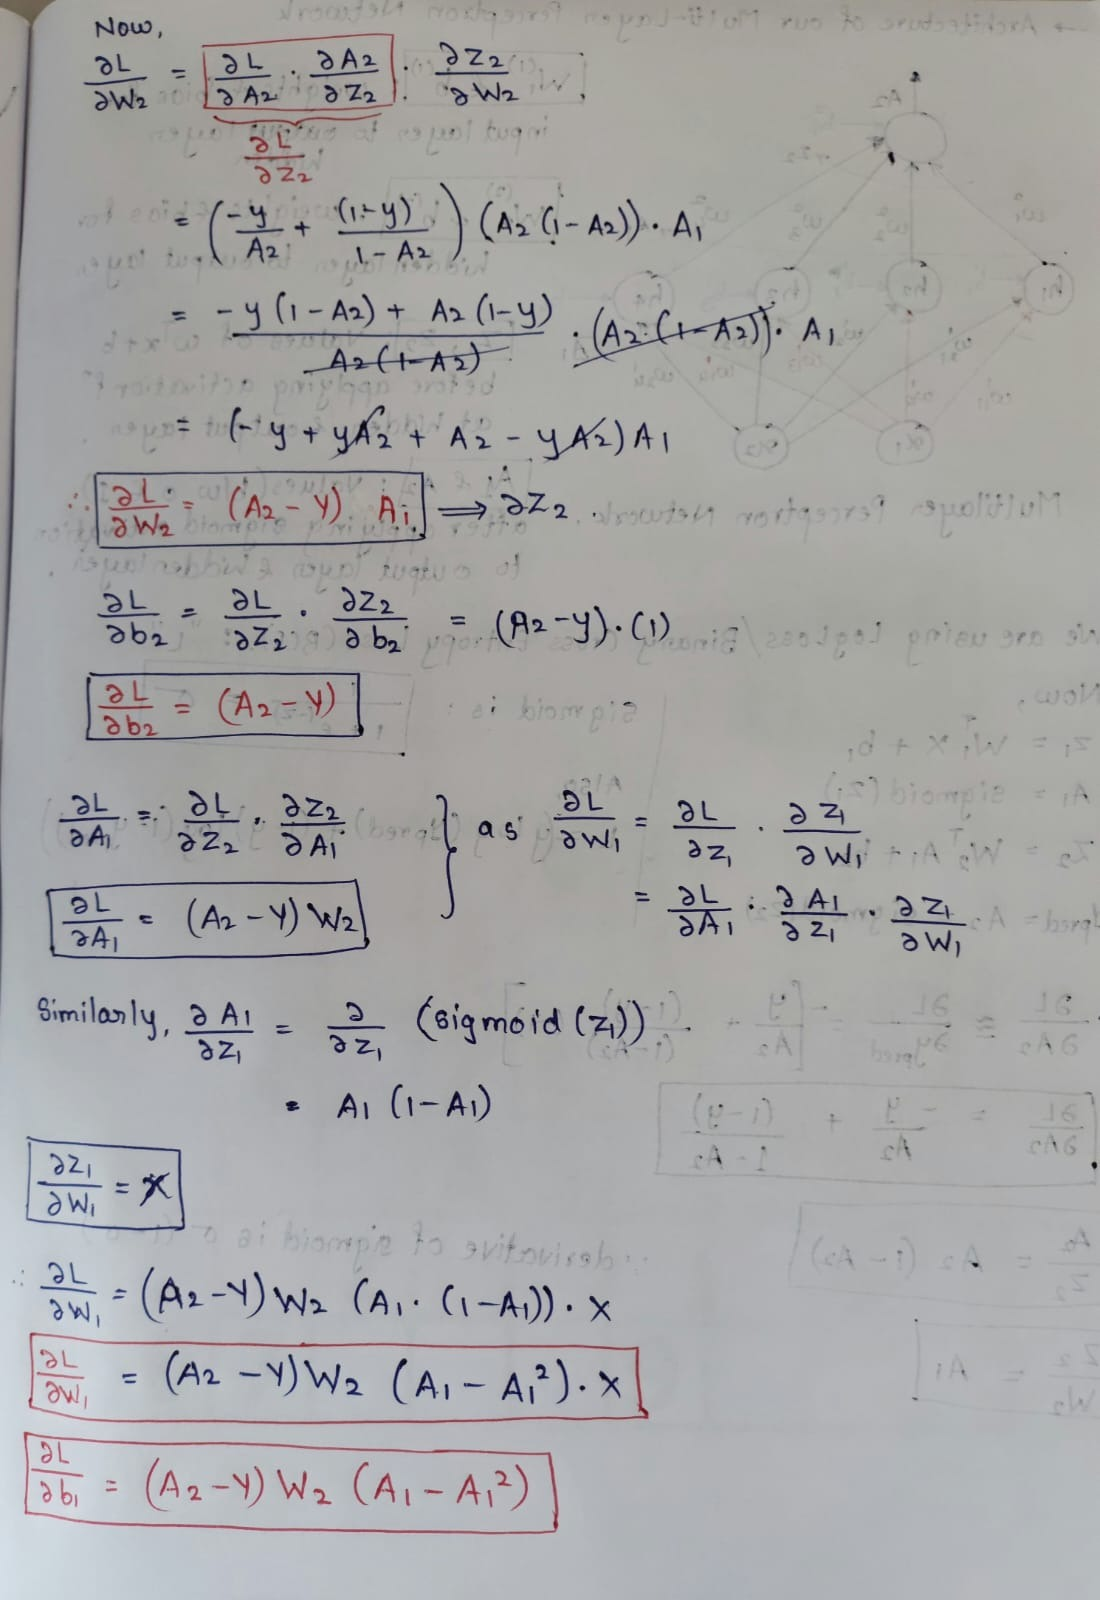

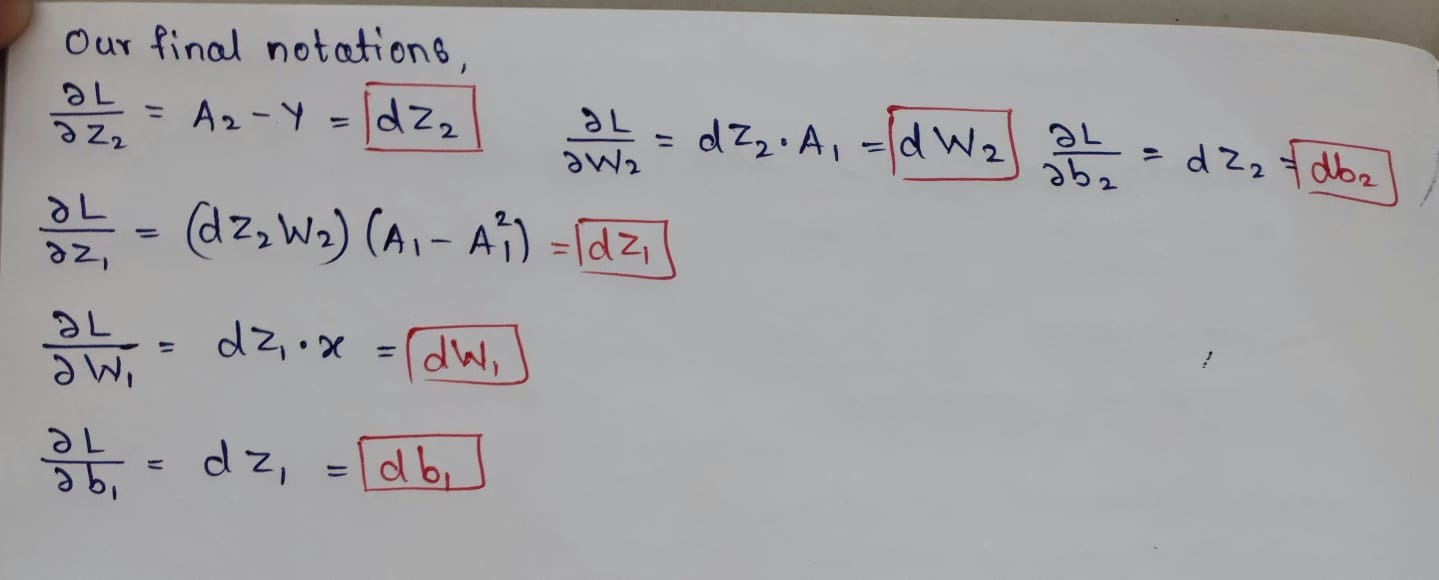

In [ ]:
class MultiLayerPerceptron:

  # Constructor/Function which initialises the class's variables
  def __init__(self, N1=500, N2=500, n=2, hidden_neurons=4, eta=0.1, MAX_EPOCHS=1000):
    # N1 = no. of datapoints where label is y = 1, N2 = no. of datapoints where label is y = 0, N = total number of datapoints
    # n = no. of features
    # hidden_neurons = no. of neurons in the hidden layer
    # eta = learning rate
    # X = features, Y = label
    # W1 & b1 = weights & bias corresponding to 1st layer (i.e. input layer --> hidden layer) respectively
    # W2 & b2 = weights & bias corresponding to 2nd layer (i.e. hidden layer --> output layer) respectively
    self.N1 = N1
    self.N2 = N2
    self.N = self.N1 + self.N2
    self.n = n
    self.hidden_neurons = hidden_neurons
    self.eta = eta
    self.MAX_EPOCHS = MAX_EPOCHS
    self.X = None
    self.Y = None
    self.W1 = None
    self.W2 = None
    self.b1 = None
    self.b2 = None

  # Function to prepare dataset where we have 2 classes(binary classification) such that the datapoints of the classes create concentric circles
  def make_raw_dataset(self):
    X_raw, y_raw = sklearn.datasets.make_circles(n_samples=self.N, factor=0.6, noise=0.08)
    zero_class = np.where(y_raw == 0)
    one_class = np.where(y_raw == 1)
    pos_class_samples = torch.tensor(X_raw[zero_class])
    neg_class_samples = torch.tensor(X_raw[one_class])
    return pos_class_samples, neg_class_samples
  
  # Function to plot the scatter plot of the generated datapoints
  def plot_graph_before_training(self, pos_class_samples, neg_class_samples):
    plt.scatter(pos_class_samples[:,0], pos_class_samples[:,1])
    plt.scatter(neg_class_samples[:,0], neg_class_samples[:,1])
    plt.show()
  
  # Function to plot the scatter plot of the generated datapoints
  def prepare_training_data(self, pos_class_samples, neg_class_samples):
    self.X = torch.empty(self.N, self.n)
    self.X[0:self.N1, :] = pos_class_samples
    self.X[self.N1:self.N, :] = neg_class_samples
    self.X = self.X.mT

    self.Y = torch.empty(1, self.N)
    self.Y[0:self.N1] = 1.0
    self.Y[self.N1:self.N] = 0.0

  # Function intialises the multilayer perceptron network's learnable parameter
  def initialise_network_parameters(self):
    self.W1 = torch.randn(self.hidden_neurons, self.n)
    self.W2 = torch.zeros(1, self.hidden_neurons)
    self.b1 = torch.randn(self.hidden_neurons, 1)
    self.b2 = torch.randn(1, 1)

  # Function which the "Log Loss" also called as "Binary Cross Entropy Loss(BCE)"
  def logloss(self, A2):
    loss = 0.0
    logLossSum = torch.multiply(self.Y, torch.log(A2)) + torch.multiply((1 - self.Y), torch.log(1 - A2))
    loss = -torch.sum(logLossSum) / self.N
    return loss
  
  # Function which computes sigmoid activation function which is used in forward pass for stamping values between 0 and 1 
  def sigmoid(self, Z):
    return 1.0 / (1.0 + torch.exp(-Z))
  
  # Function which computes derivative of sigmoid activation function which is used in backward pass
  def sigmoid_derivate(self, Z):
    rho = 1.0 / (1.0 + torch.exp(-Z))
    return rho * (1 - rho)
  
  # Function which does forward propagation through the multilayer perceptron network
  # It stores the intermediate results computed in forward propagation in the cache
  def forward_propagation(self):
    Z1 = torch.matmul(self.W1, self.X) + self.b1
    A1 = self.sigmoid(Z1)
    Z2 = torch.matmul(self.W2, A1) + self.b2
    A2 = self.sigmoid(Z2)
    cache = {"A2" : A2, "Z2" : Z2, "A1" : A1, "Z1" : Z1}
    return cache
  
  # Function which does backward propagation through the multilayer perceptron network
  # It uses the intermediate results of forward propagation which were stored in the cache
  def backward_propagation(self, cache):
    A1 = cache["A1"]
    A2 = cache["A2"]

    dZ2 = A2 - self.Y
    
    dW2 = (1 / self.N) * torch.matmul(dZ2, A1.T)
    db2 = (1 / self.N) * torch.sum(dZ2, axis = 1, keepdim = True)

    dZ1 = torch.multiply(torch.matmul(self.W2.T, dZ2), A1 - torch.pow(A1, 2))
    dW1 = (1 / self.N) * torch.matmul(dZ1, self.X.T)
    db1 = (1 / self.N) * torch.sum(dZ1, axis = 1, keepdim = True)

    self.W2 = self.W2 - self.eta * dW2
    self.b2 = self.b2 - self.eta * db2
    self.W1 = self.W1 - self.eta * dW1
    self.b1 = self.b1 - self.eta * db1
  
  # Function which performs gradient descent through the multilayer perceptron network
  # It does following steps in sequence for MAX_EPOCHS - 
  #   1. Forward propagation through the network for entire dataset
  #   2. Computes loss between the predicted labels & true labels
  #   3. Backward propagation through the network
  def gradient_descent(self):
    loss_arr = []
    for i in range(self.MAX_EPOCHS):
      cache = self.forward_propagation()
      A2 = cache["A2"]
      loss = self.logloss(A2)
      if(i % 300 == 0):
        print("epoch", i, "--->", loss.item())
      loss_arr.append(loss)
      self.backward_propagation(cache)
    return loss_arr

  # Function which performs gradient descent through the multilayer perceptron network
  def plot_epochs_vs_loss(self, loss_arr):
    xpoints = torch.tensor(np.arange(1, self.MAX_EPOCHS + 1))
    ypoints = loss_arr
    plt.xlabel("No. of Epochs")
    plt.ylabel("Loss")
    plt.title("No. of Epochs vs Loss")
    plt.plot(xpoints, ypoints, c='r')
    plt.show()
  
  # Function which runs all steps for multi layer perceptron algorithm
  def run_multilayer_perceptron_algorithm(self):
    # Step 1: Prepare raw dataset 
    pos_class_samples, neg_class_samples = mlp.make_raw_dataset()

    # Step 2: Plot scatterplot of dataset generated in step 1 
    self.plot_graph_before_training(pos_class_samples, neg_class_samples)

    # Step 3: Prepare training data for running MLP algorithm 
    self.prepare_training_data(pos_class_samples, neg_class_samples)
    print("X.shape =", self.X.shape, "Y.shape =", self.Y.shape)

    # Step 4: Initialise the MLP network parameters
    self.initialise_network_parameters()
    print("W1.shape =", self.W1.shape, "b1.shape =", self.b1.shape)
    print("W2.shape =", self.W2.shape, "b2.shape =", self.b2.shape)

    # Step 5: Run the gradient descent algorithm which involves backpropagation
    loss_arr = self.gradient_descent()

    # Step 6 : Plot the graph of epochs vs loss
    self.plot_epochs_vs_loss(loss_arr)

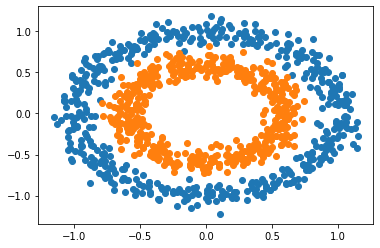

X.shape = torch.Size([2, 1000]) Y.shape = torch.Size([1, 1000])
W1.shape = torch.Size([4, 2]) b1.shape = torch.Size([4, 1])
W2.shape = torch.Size([1, 4]) b2.shape = torch.Size([1, 1])
epoch 0 ---> 1.4408377408981323
epoch 300 ---> 0.01297744456678629
epoch 600 ---> 0.0061036390252411366
epoch 900 ---> 0.003946286626160145
epoch 1200 ---> 0.002901107305660844
epoch 1500 ---> 0.002287073526531458
epoch 1800 ---> 0.0018840926932170987
epoch 2100 ---> 0.0015997937880456448
epoch 2400 ---> 0.001388739561662078
epoch 2700 ---> 0.001226005726493895


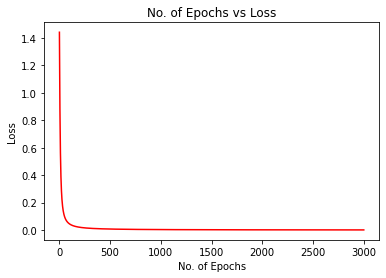

In [ ]:
mlp = MultiLayerPerceptron(N1=500, N2=500, n=2, hidden_neurons=4, eta=0.1, MAX_EPOCHS=3000)
mlp.run_multilayer_perceptron_algorithm()

### Observation : From the above graph of "No. of Epochs vs Loss" it is clear that after every epoch loss decreases gradually when we are using Gradient Descent with Backpropagation